# Data Analysis Project using Python on Covid - 19 Analysis

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data from the url link

In [3]:
url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'
data = pd.read_csv(url)

Understanding the data

In [6]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [7]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57393,NaN,NaN,International,17/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


High Level Data Understanding:
Find no. of rows & columns in the dataset
Data types of columns.
Info & describe of data in dataframe.

In [4]:
data.shape

(57394, 49)

In [5]:
data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [11]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


Low Level Data Understanding :

Finding count of unique values in location column.
Find which continent has maximum frequency using values

In [15]:
data['location'].nunique()

216

In [20]:
data['continent'].value_counts().head(1)

Europe    14828
Name: continent, dtype: int64

In [ ]:
 c. Find maximum & mean value in 'total_cases'.
 d. Find 25%,50% & 75% quartile value in 'total_deaths'.
 e. Find which continent has maximum 'human_development_index'.
 f. Find which continent has minimum 'gdp_per_capita'.


In [22]:
print(data['total_cases'].mean())
print(data['total_cases'].max())

167797.3688753302
55154651.0


In [23]:
data['total_deaths'].quantile([0.25,0.50,0.75])

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

In [31]:
data.groupby(by = 'continent')['human_development_index'].max().idxmax()

'Europe'

In [36]:
data.groupby('continent')['gdp_per_capita'].min().idxmin()

'Africa'

Filtering the dataframe with  this columns for better understanding of the data

['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] 
and updating  the data frame.


In [38]:
updated_data = data[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
updated_data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


Data Cleaning

 a. Removing all duplicates observations
 
 b. Finding missing values in all columns
 
 c. Removing all observations where continent column value is missing 
 
 d. Filling all missing values with 0 for better analysis


In [39]:
df = updated_data.drop_duplicates()

In [40]:
df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [41]:
updated_data = df.dropna(subset = ['continent'])

In [42]:
updated_data.isnull().sum()

continent                      0
location                       0
date                           0
total_cases                 3600
total_deaths               12964
gdp_per_capita              6704
human_development_index     7501
dtype: int64

In [43]:
updated_data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [44]:
updated_data.fillna(value = 0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


 Date time format :
        
 a. Converting date column in datetime format using pandas.to_datetime

 b. Creating new column month after extracting month data from date to understand on which month the cases are high

In [46]:
df['date']=pd.to_datetime(df['date'])

In [48]:
updated_data.dtypes

continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

In [51]:
df['month'] = df['date'].dt.month

In [52]:
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
57389,NaN,International,2020-11-13,696.0,7.0,NaN,NaN,11
57390,NaN,International,2020-11-14,696.0,7.0,NaN,NaN,11
57391,NaN,International,2020-11-15,696.0,7.0,NaN,NaN,11
57392,NaN,International,2020-11-16,696.0,7.0,NaN,NaN,11


Data Aggregation:
    
 a. Finding max value in all columns on 'continent' column

 b. Storing the result in a new dataframe named 'df_groupby'.
    
 (Using df_groupby dataframe for all further analysis)


In [56]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


Feature Engineering :
    
 a. Creating a new feature 'total_deaths_to_total_cases' by ratio of
 'total_deaths' column to 'total_cases'

In [57]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths']/df_groupby['total_cases']
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


Data Visualization :
 a. Univariate analysis on 'gdp_per_capita' column by
plotting histogram using seaborn dist plot.

 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
    
 c. Plot Pairplot on df_groupby dataset.

 d. Plot a bar plot of 'continent' column with 'total_cases' .
    

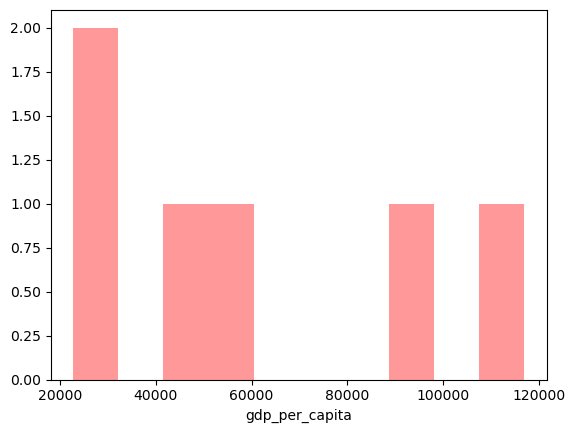

In [70]:
sns.distplot(df_groupby['gdp_per_capita'],kde = False,color = 'red',bins = 10)
plt.show()

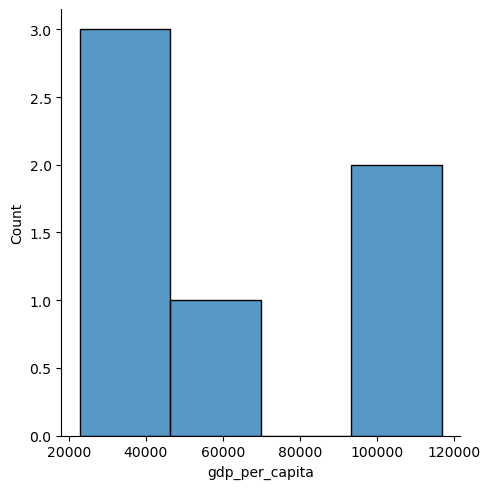

In [71]:
sns.displot(df_groupby['gdp_per_capita'])

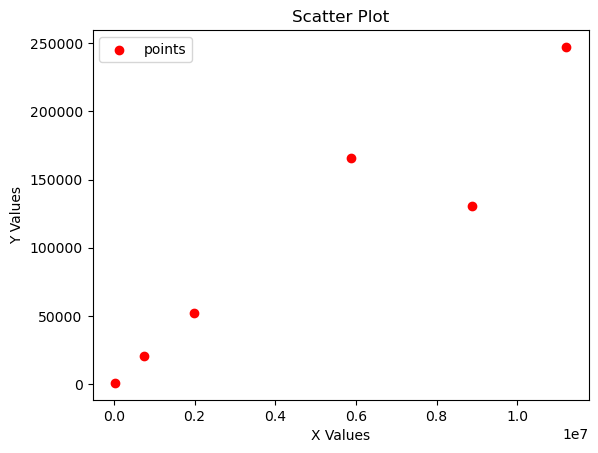

In [73]:
x = df_groupby['total_cases']
y = df_groupby['total_deaths']
plt.scatter(x,y,label = 'points',c = 'red')
plt.xlabel('X Values')
plt.ylabel('Y Values')

plt.title('Scatter Plot')
plt.legend()
plt.show()

In [76]:
df_groupby.shape

(6, 9)

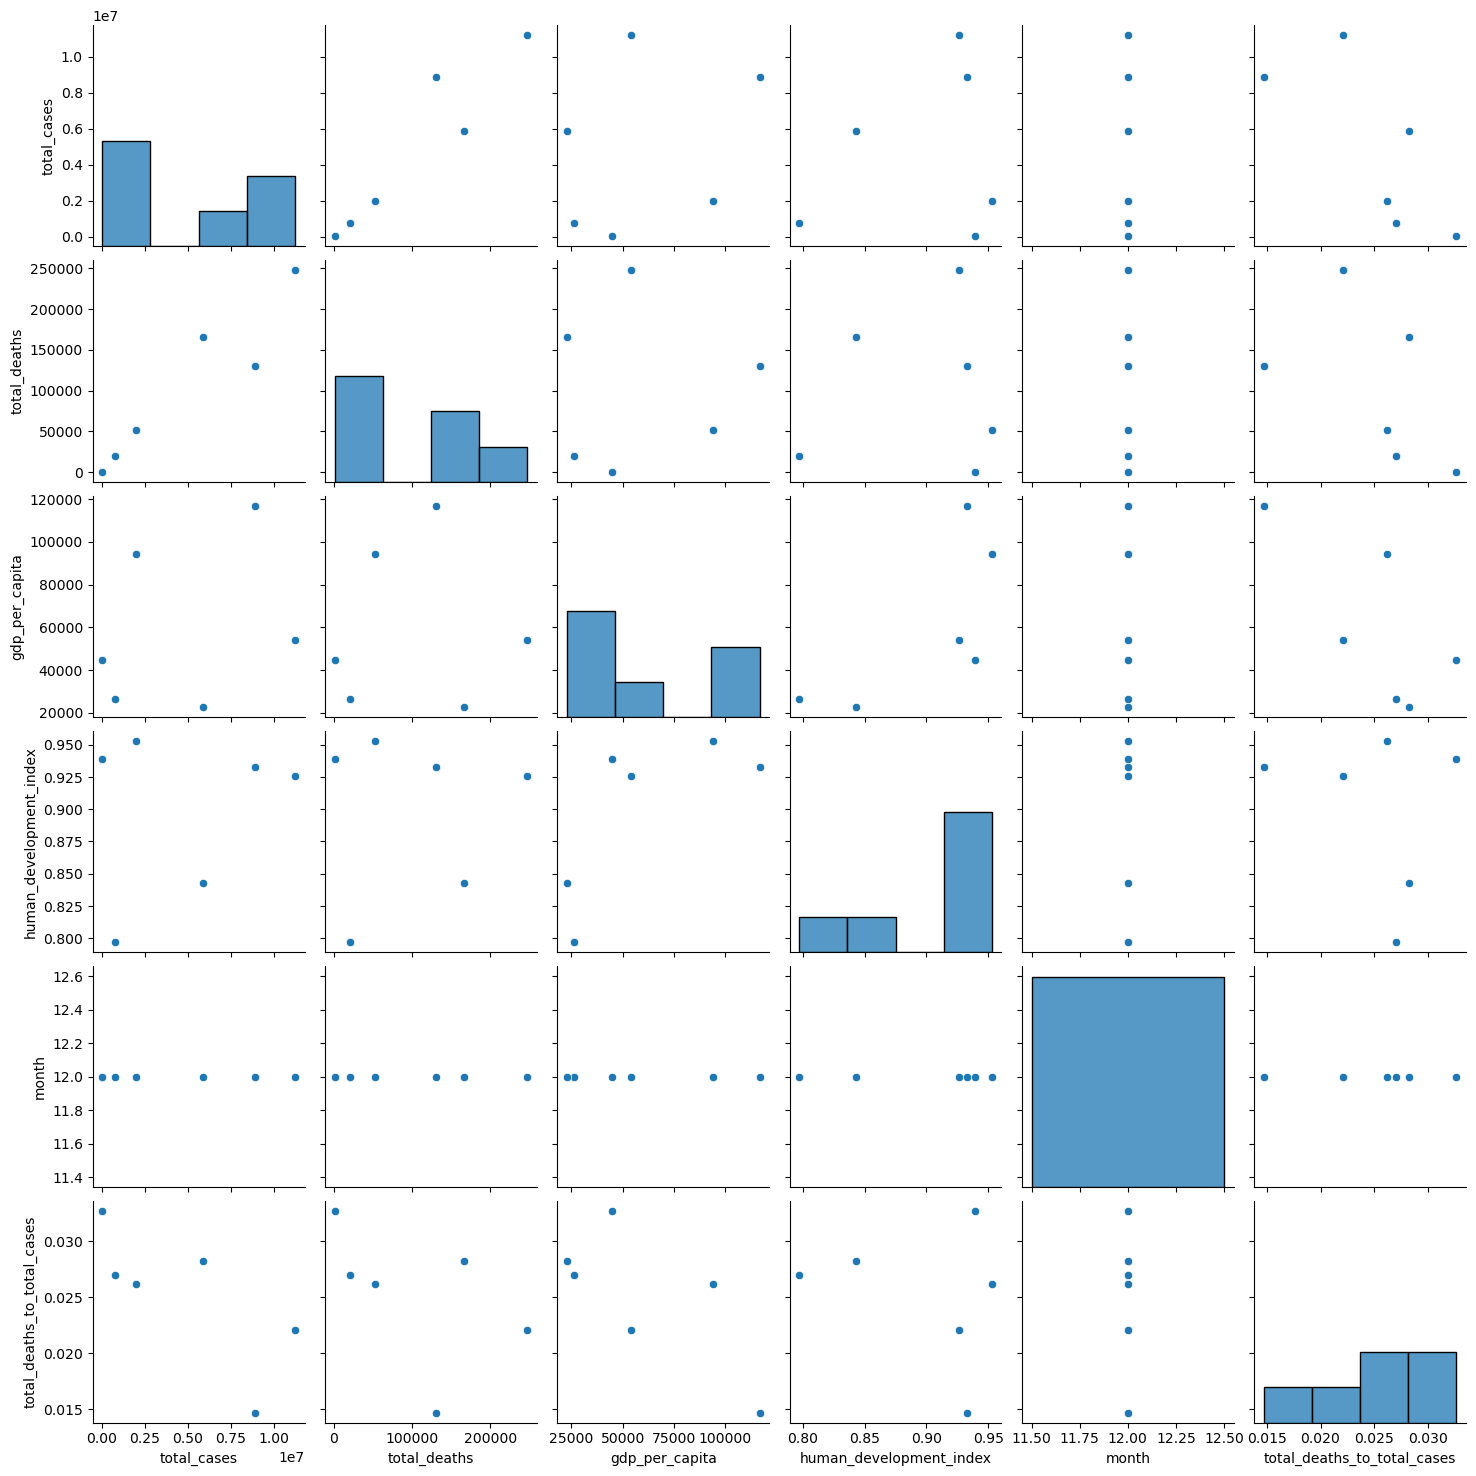

In [77]:
sns.pairplot(df_groupby)

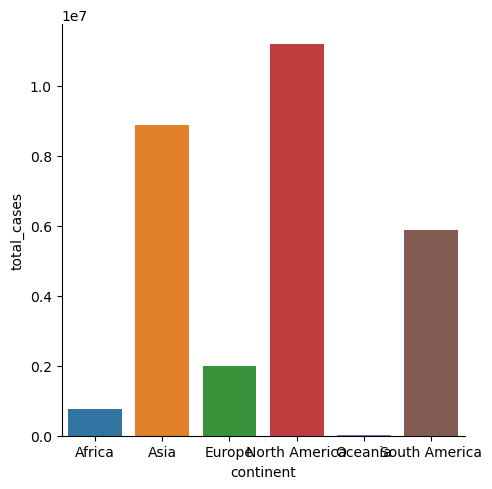

In [78]:
sns.catplot(x='continent', y='total_cases', kind='bar', data=df_groupby)

In [80]:
# Converting the result into a csv file 

In [79]:
df_groupby.to_csv('df_groupby.csv', index=False)